In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
data = pd.read_csv('../data/wheat/seeds_dataset.txt',header=None,sep='\s+',converters={7:lambda x: int(x)-1})
data.rename(columns={7:'label'},inplace=True)
data.head()

,0,1,2,3,4,5,6,label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [3]:
data.label.value_counts()

label
0    70
1    70
2    70
Name: count, dtype: int64

In [4]:
X = data.drop(columns='label')
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [5]:
params = {"objective":'multi:softmax',
          'eval_metric':"merror",
          'booster':'gbtree',
          'eta': 0.1,
          'max_depth': 5,
          'num_class': 3}
watchlist = [(dtrain,'train'),(dtest,'eval')]
num_round = 50
bst =xgb.train(params,dtrain,num_round,watchlist)

[0]	train-merror:0.00595	eval-merror:0.14286
[1]	train-merror:0.00000	eval-merror:0.14286
[2]	train-merror:0.01190	eval-merror:0.14286
[3]	train-merror:0.01786	eval-merror:0.14286
[4]	train-merror:0.01786	eval-merror:0.14286
[5]	train-merror:0.01190	eval-merror:0.14286
[6]	train-merror:0.01190	eval-merror:0.14286
[7]	train-merror:0.01190	eval-merror:0.14286
[8]	train-merror:0.01190	eval-merror:0.14286
[9]	train-merror:0.00595	eval-merror:0.14286
[10]	train-merror:0.00595	eval-merror:0.14286
[11]	train-merror:0.00595	eval-merror:0.14286
[12]	train-merror:0.00595	eval-merror:0.14286
[13]	train-merror:0.00595	eval-merror:0.14286
[14]	train-merror:0.00595	eval-merror:0.14286
[15]	train-merror:0.00595	eval-merror:0.14286
[16]	train-merror:0.00595	eval-merror:0.14286
[17]	train-merror:0.00595	eval-merror:0.14286
[18]	train-merror:0.00595	eval-merror:0.14286
[19]	train-merror:0.00595	eval-merror:0.14286
[20]	train-merror:0.00595	eval-merror:0.14286
[21]	train-merror:0.00000	eval-merror:0.1428

F:\envs\ML\lib\site-packages\xgboost\core.py:723: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[36]	train-merror:0.00000	eval-merror:0.14286
[37]	train-merror:0.00000	eval-merror:0.14286
[38]	train-merror:0.00000	eval-merror:0.14286
[39]	train-merror:0.00000	eval-merror:0.14286
[40]	train-merror:0.00000	eval-merror:0.14286
[41]	train-merror:0.00000	eval-merror:0.14286
[42]	train-merror:0.00000	eval-merror:0.14286
[43]	train-merror:0.00000	eval-merror:0.14286
[44]	train-merror:0.00000	eval-merror:0.14286
[45]	train-merror:0.00000	eval-merror:0.14286
[46]	train-merror:0.00000	eval-merror:0.14286
[47]	train-merror:0.00000	eval-merror:0.14286
[48]	train-merror:0.00000	eval-merror:0.14286
[49]	train-merror:0.00000	eval-merror:0.14286


In [6]:
pred = bst.predict(dtest)
error_rate = np.sum(pred!=y_test)/y_test.shape[0]
print('Error Rate:',error_rate)

Error Rate: 0.14285714285714285


In [7]:
params['objective']='multi:softprob'
bst = xgb.train(params,dtrain,num_round,watchlist)

[0]	train-merror:0.00595	eval-merror:0.14286
[1]	train-merror:0.00000	eval-merror:0.14286
[2]	train-merror:0.01190	eval-merror:0.14286
[3]	train-merror:0.01786	eval-merror:0.14286
[4]	train-merror:0.01786	eval-merror:0.14286
[5]	train-merror:0.01190	eval-merror:0.14286
[6]	train-merror:0.01190	eval-merror:0.14286
[7]	train-merror:0.01190	eval-merror:0.14286
[8]	train-merror:0.01190	eval-merror:0.14286
[9]	train-merror:0.00595	eval-merror:0.14286
[10]	train-merror:0.00595	eval-merror:0.14286
[11]	train-merror:0.00595	eval-merror:0.14286
[12]	train-merror:0.00595	eval-merror:0.14286
[13]	train-merror:0.00595	eval-merror:0.14286
[14]	train-merror:0.00595	eval-merror:0.14286
[15]	train-merror:0.00595	eval-merror:0.14286
[16]	train-merror:0.00595	eval-merror:0.14286
[17]	train-merror:0.00595	eval-merror:0.14286
[18]	train-merror:0.00595	eval-merror:0.14286
[19]	train-merror:0.00595	eval-merror:0.14286
[20]	train-merror:0.00595	eval-merror:0.14286
[21]	train-merror:0.00000	eval-merror:0.1428

In [8]:
pred = bst.predict(dtest)
class_ = np.argmax(pred,axis=1)
print(class_)

[2 0 2 1 1 2 0 1 2 2 2 1 2 0 1 2 2 2 1 2 0 2 2 2 1 2 2 2 0 1 2 2 2 2 1 1 0
 0 2 2 2 1]


In [9]:
# dump_model = bst.dump_model('../saved_models/dump_multi_class.txt')

ImportError: You must install graphviz to plot tree

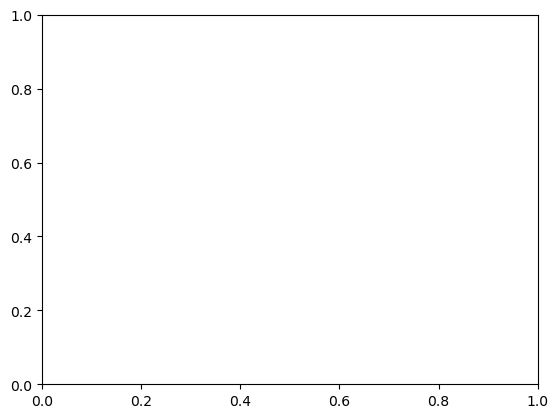

In [11]:
xgb.plot_tree(bst)